<a href="https://colab.research.google.com/github/Rounak-Das-02/ML_Project/blob/master/model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
import pandas as pd
import numpy as np

In [ ]:
#Loading data
from google.colab import files
uploaded = files.upload() ## Uploading from local.


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['FinalVehiclesData.csv'])) ## Code snippet copied from Google
df.head()


In [ ]:
test = df[4:5]
test

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df2 = df.sample(500)
df2.shape

In [ ]:
df.type

# DATA VISUALIZATION:

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns

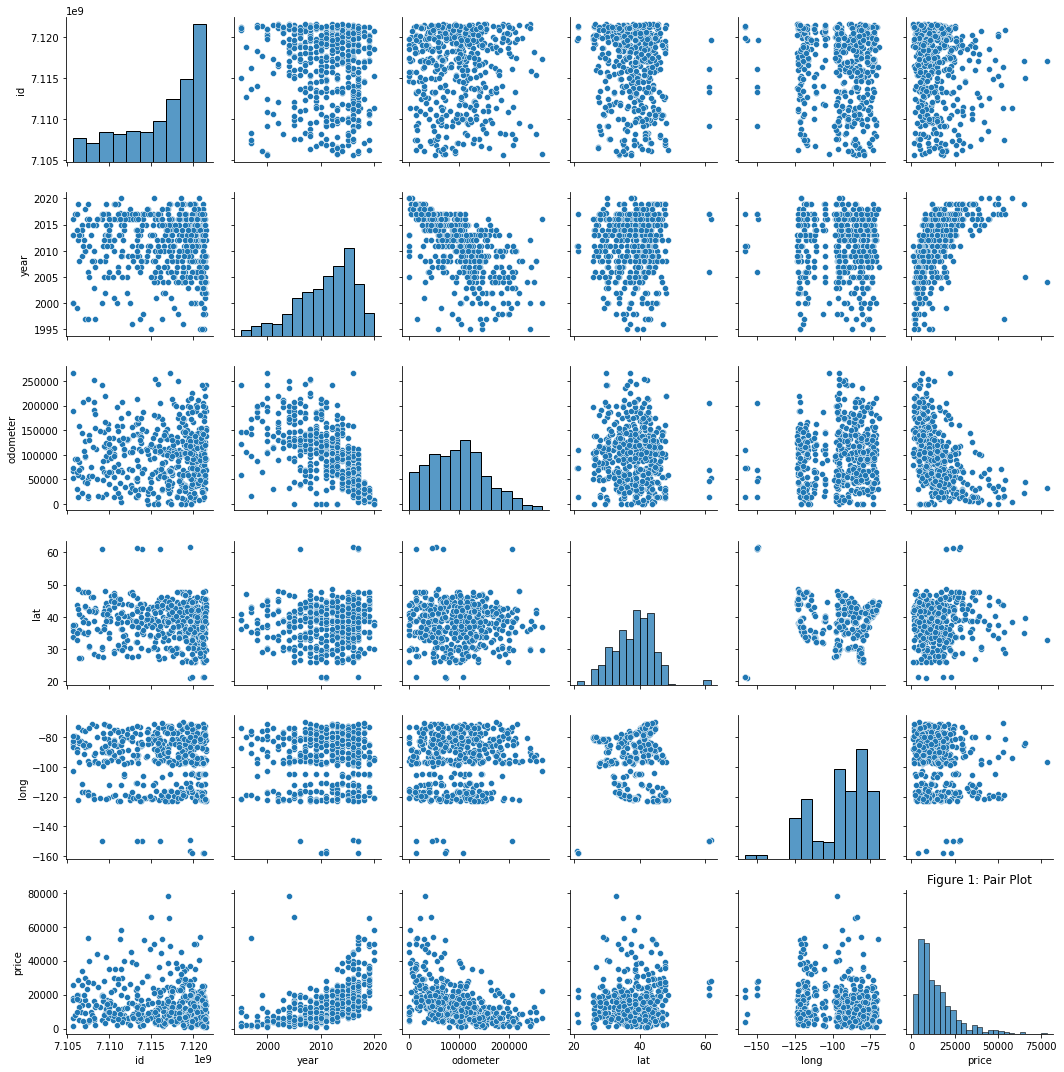

In [167]:
sns.pairplot(df2)
plt.title('Figure 1: Pair Plot')
plt.tight_layout()
plt.show()

# MODEL IMPLEMENTATIONS:

In [168]:
import time
from tqdm import tqdm

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [169]:
df=df.drop('id',axis=1)

df3=df.copy()
df.head()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,mohave county,2012.0,jeep,patriot,like new,4 cylinders,gas,247071.0,clean,automatic,4wd,full-size,offroad,silver,34.4554,-114.2690,3495
1,oregon coast,2014.0,bmw,328i m-sport,good,5 cylinders,gas,76237.0,clean,automatic,rwd,full-size,sedan,grey,46.1837,-123.8240,13750
2,greenville / upstate,2001.0,dodge,caravan,excellent,6 cylinders,gas,199000.0,clean,automatic,4wd,full-size,offroad,grey,34.9352,-81.9654,2300
3,mohave county,2004.0,chevrolet,colorado ls,excellent,5 cylinders,gas,54000.0,clean,automatic,rwd,mid-size,pickup,red,34.4783,-114.2710,9000
4,maine,2005.0,ford,mustang convertible,excellent,6 cylinders,gas,62800.0,clean,automatic,rwd,mid-size,convertible,silver,44.2070,-69.7858,8500


In [170]:
#defining numerical and categorical values

num_col=['year','odometer','long','lat']

cat_cols=['region','manufacturer','model','condition','cylinders','fuel',
          'title_status','transmission','drive','size','type','paint_color']

In [171]:
# Encoding categorical columns.
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
d = defaultdict(LabelEncoder)
fit = df[cat_cols].apply(lambda x : d[x.name].fit_transform(x)) ## Fit transforming
# fit.apply(lambda x: d[x.name].inverse_transform(x))
df[cat_cols] = df[cat_cols].apply(lambda x : d[x.name].transform(x))
# le=LabelEncoder()
# df[cat_cols]=df[cat_cols].apply(le.fit_transform)

In [172]:
df.head()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,220,2012.0,19,20087,3,3,2,247071.0,0,0,0,1,6,9,34.4554,-114.2690,3495
1,258,2014.0,4,2438,2,4,2,76237.0,0,0,2,1,9,5,46.1837,-123.8240,13750
2,131,2001.0,9,9105,0,5,2,199000.0,0,0,0,1,6,5,34.9352,-81.9654,2300
3,220,2004.0,7,9929,0,4,2,54000.0,0,0,2,2,8,8,34.4783,-114.2710,9000
4,202,2005.0,12,19107,0,5,2,62800.0,0,0,2,2,2,9,44.2070,-69.7858,8500


In [173]:
import joblib
joblib.dump(d, "categorical_encoder_dict.joblib")
joblib.dump(fit, "categorical_encoder.joblib") ## Just in case

['categorical_encoder.joblib']

In [174]:
dic = joblib.load("/content/categorical_encoder_dict.joblib")

In [175]:
# # Encoding numerical columns.
# from sklearn.preprocessing import StandardScaler
# from collections import defaultdict
# d = defaultdict(StandardScaler)
# fit = df[num_col].apply(lambda x : d[x.name].fit_transform(x)) ## Fit transforming
# # fit.apply(lambda x: d[x.name].inverse_transform(x))
# df[num_col] = df[num_col].apply(lambda x : d[x.name].transform(x))
# # le=LabelEncoder()
# # df[cat_cols]=df[cat_cols].apply(le.fit_transform)

In [176]:
test[cat_cols] = test[cat_cols].apply(lambda x : dic[x.name].transform(x))

In [177]:
test

,id,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
4,7120430837,202,2005.0,12,19107,0,5,2,62800.0,0,0,2,2,2,9,44.207,-69.7858,8500


In [178]:
# Scaling Numerical columns

norm = StandardScaler()
df['odometer'] = df["odometer"]/ df["odometer"].max()
df['year'] = df['year']/df['year'].max()
df['model'] = df["model"]/df["model"].max()


df['region'] = df["region"] / df["region"].max()
df['lat'] = df["lat"]/ df["lat"].max()
df['long'] = df["lat"] / df["lat"].max()


In [179]:
# Encoding categorical columns.
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
d = defaultdict(LabelEncoder)
fit = df[cat_cols].apply(lambda x : d[x.name].fit_transform(x)) ## Fit transforming
# fit.apply(lambda x: d[x.name].inverse_transform(x))
df[cat_cols] = df[cat_cols].apply(lambda x : d[x.name].transform(x))
# le=LabelEncoder()
# df[cat_cols]=df[cat_cols].apply(le.fit_transform)



In [180]:
df.head()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,220,0.995547,19,20087,3,3,2,0.919971,0,0,0,1,6,9,0.432846,0.432846,3495
1,258,0.996536,4,2438,2,4,2,0.283869,0,0,2,1,9,5,0.580183,0.580183,13750
2,131,0.990104,9,9105,0,5,2,0.740978,0,0,0,1,6,5,0.438874,0.438874,2300
3,220,0.991588,7,9929,0,4,2,0.201069,0,0,2,2,8,8,0.433134,0.433134,9000
4,202,0.992083,12,19107,0,5,2,0.233836,0,0,2,2,2,9,0.555351,0.555351,8500


Splitting data into test and train datasets

In [181]:
from sklearn.model_selection import train_test_split

n = list(range(len(list(df.columns))-1))
X = df.iloc[:,n]
y = df.iloc[:,-1:].values.T
y=y[0]

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,
                                                    test_size=0.2,random_state=42)

In [208]:
#some of models will predict neg values so this function will remove that values
def remove_neg(y_test,y_pred):
    ind=[index for index in range(len(y_pred)) if(y_pred[index]>0)]
    y_pred=y_pred[ind]
    y_test=y_test[ind]
    y_pred[y_pred<0]
    return (y_test,y_pred)

accu = pd.DataFrame()
accu["metrics"] = ["MSE", "RMSE", "R2_score", "Accuracy"]

# ML MODELS

In [201]:
import time
import matplotlib
from sklearn.metrics import mean_squared_error,r2_score,mean_squared_error


1. Linear regression

In [202]:
from sklearn.linear_model import LinearRegression

In [203]:
LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)

In [ ]:
y_test_1,y_pred_1=remove_neg(y_test,y_pred)

LR_MSE = mean_squared_error(y_test_1,y_pred_1)
LR_RMSE = np.sqrt(mean_squared_error(y_test_1,y_pred_1))
LR_R2 = r2_score(y_test_1,y_pred_1) 
LR_acc =  round(r2_score(y_test_1,y_pred_1)*100,4)   

met_LR = [LR_MSE, LR_RMSE, LR_R2,LR_acc]

print('Coefficients: \n', LR.coef_)
print("MSE: {}".format(LR_MSE))
print("RMSE: {}".format(LR_RMSE))
print("R2 Score: {} or {}%".format(LR_R2, LR_acc))
accu['Linear Regression'] = met_LR




In [225]:
accu.to_csv('Errors.csv')

2. Ridge regression

In [209]:
from sklearn.linear_model import Ridge, RidgeCV

In [210]:
Ridge_Regression = Ridge()
Ridge_Regression.fit(X_train, y_train)
y_pred = Ridge_Regression.predict(X_test)

In [ ]:
y_test_2, y_pred_2 = remove_neg(y_test,y_pred)

R_MSE = mean_squared_error(y_test_2,y_pred_2)
R_RMSE = np.sqrt(mean_squared_error(y_test_2,y_pred_2))
R_R2 = r2_score(y_test_2,y_pred_2) 
R_acc =  round(r2_score(y_test_2,y_pred_2)*100,4)   

met_R = [R_MSE, R_RMSE, R_R2, R_acc]

print("MSE: {}".format(R_MSE))
print("RMSE: {}".format(R_RMSE))
print("R2 Score: {} or {}%".format(R_R2, R_acc))
accu['Ridge Regression'] = met_R


In [213]:
accu.to_csv('Errors.csv')

3. Lasso Regression

In [214]:
from sklearn.linear_model import Lasso, LassoCV

In [215]:
lasso=Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)

In [ ]:
y_test_3, y_pred_3 = remove_neg(y_test,y_pred)

L_MSE = mean_squared_error(y_test_3,y_pred_3)
L_RMSE = np.sqrt(mean_squared_error(y_test_3,y_pred_3))
L_R2 = r2_score(y_test_3,y_pred_3) 
L_acc = round(r2_score(y_test_3,y_pred_3)*100,4)   

met_L = [L_MSE, L_RMSE, L_R2,L_acc]

print("MSE: {}".format(L_MSE))
print("RMSE: {}".format(L_RMSE))
print("R2 Score: {} or {}%".format(L_R2, L_acc))
accu['Lasso Regression'] = met_L

In [217]:
accu.to_csv('Errors.csv')

4. KNN

In [219]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
#estimating MSE for k=1-9
K_RMSE=[]
for i in range(1,10):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(X_train,y_train)
    y_pred=KNN.predict(X_test)
    error=np.sqrt(mean_squared_error(y_test, y_pred))
    K_RMSE.append(error)
    print("K =",i," , RMSE =",error)


In [ ]:
#plotting error

c = pd.DataFrame(K_RMSE) #curve of errors 
plt.figure(figsize=(10,6))
plt.xticks(list(range(1,10)), list(range(1,10)), rotation='horizontal')
plt.plot(list(range(1,10)),K_RMSE)

plt.xlabel('K')
plt.ylabel('MSE')
plt.title('Error plot for every K')
plt.show()

In [ ]:
KNN=KNeighborsRegressor(n_neighbors=3) ## Using k = 3, since it has least error
KNN.fit(X_train,y_train)
y_pred=KNN.predict(X_test)

In [ ]:
#model evaluation
KNN_MSE = mean_squared_error(y_test,y_pred)
KNN_RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
KNN_R2 = r2_score(y_test,y_pred) 
KNN_acc =  round(r2_score(y_test,y_pred)*100,4)   

met_KNN = [KNN_MSE, KNN_RMSE, KNN_R2,KNN_acc]

print("MSE: {}".format(KNN_MSE))
print("RMSE: {}".format(KNN_RMSE))
print("R2 Score: {} or {}%".format(KNN_R2, KNN_acc))
accu['KNN']=met_KNN

In [ ]:
accu.to_csv('Errors.csv')

5. Random Forest

In [85]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regressor = RandomForestRegressor(n_estimators=200,random_state=0, min_samples_leaf=1,
                                  max_features=0.5, n_jobs=-1, oob_score=True) 
## Will have to tune hyper parameters more. Grid Search CV was too time consuming, hence we decided to go with some defaults

regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

In [ ]:
RF_MSE = mean_squared_error(y_test,y_pred)
RF_RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RF_R2 = r2_score(y_test,y_pred) 
RF_acc =  round(r2_score(y_test,y_pred)*100,4)   

met_RF = [RF_MSE, RF_RMSE, RF_R2,RF_acc]

print("MSE: {}".format(RF_MSE))
print("RMSE: {}".format(RF_RMSE))
print("R2 Score: {} or {}%".format(RF_R2, RF_acc))
accu['RandomForest Regressor']=met_RF

In [238]:
accu.to_csv('Errors.csv')

6. XGBoost

In [65]:
import xgboost as xgb

In [66]:
#model implementation and fitting data
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror',
                max_depth = 24, alpha = 5, n_estimators = 200)
xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(X_test)

In [ ]:
#model evaluation
y_test_6,y_pred_6 = remove_neg(y_test,y_pred)

XG_MSE = mean_squared_error(y_test_6,y_pred_6)
XG_RMSE = np.sqrt(mean_squared_error(y_test_6,y_pred_6))
XG_R2 = r2_score(y_test_6,y_pred_6) 
XG_acc =  round(r2_score(y_test_6,y_pred_6)*100,4)   

met_XG = [XG_MSE, XG_RMSE, XG_R2,XG_acc] 

print("MSE: {}".format(XG_MSE))
print("RMSE: {}".format(XG_RMSE))
print("R2 Score: {} or {}%".format(XG_R2, XG_acc))
accu['XGBoost Regressor'] = met_XG



In [240]:
accu.to_csv('Errors.csv')

# Saving Model:

In [ ]:
import pickle
with open("models.pkl", "wb") as file: 
  pickle.dump(xg_reg,file) 

# Results:

In [ ]:
accu=pd.read_csv('./Errors.csv',index_col=0)
accu